In [82]:
import pandas as pd  
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## 1. Problem definition

The main goal of this project is to predict whether a customer has left the company or not --> 2 desicions --> binary classification

The model will be trained with customer data and labels. So we use supervised learning. It’s important to remember this prediction isn’t certain. It comes back as a probability. 

> How does the company expect to use and benefit from this model?

Customer churn is a common challenge that businesses must address, making it a key priority.

Also known as attrition, customer churn refers to the level of inactivity or disengagement observed over a specific time period. By analyzing behavioral or relational data, businesses can often identify early warning signs. Recognizing the main factors behind churn and identifying customers at risk are essential for improving business growth and strategy.

## 2. Data

In [86]:
df = pd.read_csv('Bank_Churn_Data.csv', index_col='RowNumber')
df.shape, df.columns

((10000, 13),
 Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
        'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
        'EstimatedSalary', 'Exited'],
       dtype='object'))

In [91]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Data Set:

- The data are struktured and in this case the data are static and not changing. 
- It consists of 10000 observations and 12 variables.
- Dependent variable refers to customer abandonment.

### Features:

- Surname: Surname
- CreditScore: Credit score
- Geography: Country (Germany / France / Spain)
- Gender: Gender (Female / Male)
- Age: Age
- Tenure: How many years of customer ([0, 11])
- Balance: Balance
- NumOfProducts: Bank product used ([0, 4])
- HasCrCard: Credit card status (0 = No, 1 = Yes)
- IsActiveMember: Active membership status (0 = No, 1 = Yes)
- EstimatedSalary: Estimated salary
- Exited: Abandoned or not? (0 = No, 1 = Yes)

## 3. Evaluation

For a classification problem there are accuray and precion/recall (confusion matrix) important.

Remark: The main purpose of this task is to identify as many churned customers as possible. The more, the better. Therefore, recall is of more importance to us.

In [94]:
df.info()
df=df.drop(["RowNumber","CustomerId","Surname"], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


KeyError: "['RowNumber'] not found in axis"

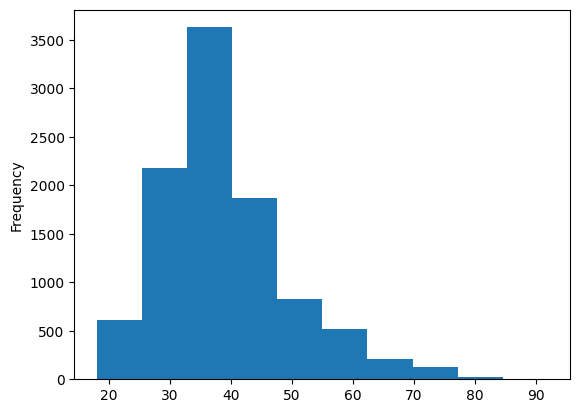

In [ ]:
df.Age.plot.hist();

In [ ]:
dependent_variable_name = "Exited"
def show_dependent_variable(df):
#     sns.countplot(data = df, x = dependent_variable_name, label = 'Count') \
#     .set_title(dependent_variable_name + ' dependent variable situation', fontsize = 18, color = 'r')
    fig, axarr = plt.subplots(2, 3, figsize=(18, 6))
    sns.countplot(x = 'Geography', hue = 'Exited',data = df, ax = axarr[0][0])
    sns.countplot(x = 'Gender', hue = 'Exited',data = df, ax = axarr[0][1])
    sns.countplot(x = 'HasCrCard', hue = 'Exited',data = df, ax = axarr[0][2])
    sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = df, ax = axarr[1][0])
    sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = df, ax = axarr[1][1])
    sns.countplot(x = 'Tenure', hue = 'Exited',data = df, ax = axarr[1][2])
    zero, one = df[dependent_variable_name].value_counts()
    print("Dependent variable distribution;")
    print(dependent_variable_name + " 0 count:", zero)
    print(dependent_variable_name + " 1 count:", one)

show_dependent_variable(df)

df.summary

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dependent variable distribution;
Exited 0 count: 7963
Exited 1 count: 2037


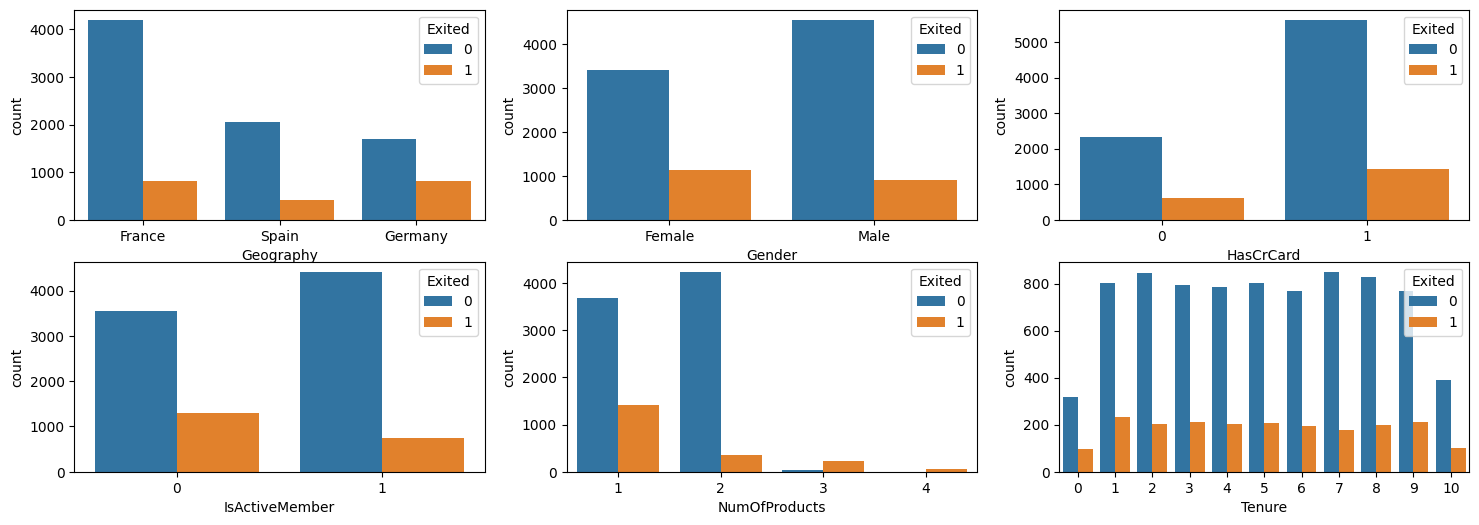

In [ ]:
show_dependent_variable(df)

Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it. <br>
Q: Why should you do this at this stage?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

len(X), len(X_train), len(X_test)

NameError: name 'X' is not defined

## Exploratory data analysis (EDA)

Next have a look on the dataset and get familiar with it. 

